In [13]:
## Imports

# General
import os
import os.path as path
import json
from glob import glob
import numpy as np
import cv2
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
# Set data to be processed
DROOT = './0_data'

# Sources
EYE_SRC = path.join(DROOT, "3_sift/comparisons/")
EYE_LBL = path.join(DROOT, "2_procfootage/eyetracker/labels.csv")
RND_SRC = path.join(DROOT, "2_procfootage/360-cropped.jpg")
RND_LBL = path.join(DROOT, "2_procfootage/round_img/labels.csv")
MAP_SFT = path.join(DROOT, "3_sift/mapping.csv")

# Destination video
VID_DST = path.join(DROOT, "3_sift/video.mp4")

<AxesSubplot:xlabel='frame'>

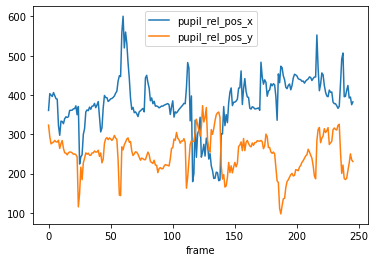

In [39]:
# Set up the positions of in-frame location
# The Y-axis is a bit confusing, but since we're dealing from with a reverse 
#  axis (lower is higher in the image), higher y means lower position.
eye_labels = pd.read_csv(EYE_LBL, index_col='frame')
eye_labels.pupil_rel_pos_x *= (720/2)
eye_labels.pupil_rel_pos_y *= (720/2)

pos_columns = ['pupil_rel_pos_x', 'pupil_rel_pos_y']
eye_labels['pupil_rel_pos_x'] += (720/2)
eye_labels[pos_columns] = eye_labels[pos_columns].astype(int)

,true_x,true_y,base_id,base_x,base_y,pupil_pos_x,pupil_pos_y,pupil_rel_pos_x,pupil_rel_pos_y,eye_left_pos_x,eye_left_pos_y,eye_right_pos_x,eye_right_pos_y,base_id_est,base_x_est,base_y_est,final_x,final_y
frame,,,,,,,,,,,,,,,,,,
242,1051,1461,166,1086,1448,-0.055846,-0.032142,392,133,-0.330534,0.014444,0.159627,0.001888,152,4344,1267,4736,1400
243,975,1568,165,905,1448,-0.054556,-0.041589,394,109,-0.329855,0.000763,0.167794,-0.010009,152,4344,1267,4738,1376
244,1106,1582,166,1086,1448,-0.063643,-0.037841,375,125,-0.335065,0.005457,0.155663,-0.006641,151,4163,1267,4538,1392
245,1017,1630,166,1086,1448,-0.060947,-0.038294,382,129,-0.332708,0.007022,0.149600,-0.005692,151,4163,1267,4545,1396


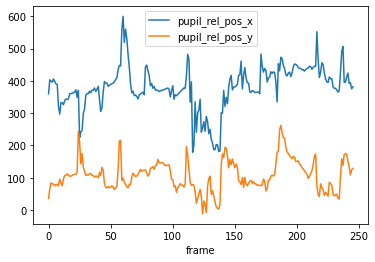

In [52]:
# Set up the positions of in-frame location
# The Y-axis is a bit confusing, but since we're dealing from with a reverse 
#  axis (lower is higher in the image), higher y means lower position.
eye_labels = pd.read_csv(EYE_LBL, index_col='frame')
eye_labels.pupil_rel_pos_x *= (720/2)
eye_labels.pupil_rel_pos_y *= (720/2)

pos_columns = ['pupil_rel_pos_x', 'pupil_rel_pos_y']
eye_labels['pupil_rel_pos_x'] += (720/2)
eye_labels[pos_columns] = eye_labels[pos_columns].astype(int)

eye_labels[pos_columns].plot()

# Get estimated location of each in base image
frameloc = pd.read_csv(MAP_SFT, index_col='frame_id')
eye_labels = eye_labels.merge(frameloc, left_index=True, right_index=True)

# Add x and y of estimated frame to transform to master image.
eye_labels['final_x'] = (eye_labels.base_x_est + eye_labels.pupil_rel_pos_x)
eye_labels['final_y'] = (eye_labels.base_y_est + eye_labels.pupil_rel_pos_y)

eye_labels.tail(4)

# Generate video

In [54]:
base = cv2.imread(RND_SRC)
height, width, layers = base.shape
print(base.shape)
r = 150

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
video = cv2.VideoWriter(VID_DST, fourcc, 10, (width, height))
i = 0

for frame in eye_labels.itertuples():

    # Setup base image
    img = Image.fromarray(base)
    canvas = ImageDraw.Draw(img, 'RGB')

    # Set xy of center eye fixation
    p_x = ((frame.final_x + 150 ) % 5792) - 150
    p_y = frame.final_y
    print(frame.Index, frame.final_x, frame.final_y)
    
    # Draw and output
    position = (p_x-r, p_y-r, p_x+r, p_y+r)
    canvas.ellipse(position, fill=(255, 128, 10, 150))
    image_array = np.array(img)
    
    # Add eye
    eye = cv2.imread(path.join(EYE_SRC, f"{frame.Index:03}.png"))
    width, height, channels = eye.shape
    image_array[0:width, 0:height, :] = eye
    
#     image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    video.write(image_array)
    
    del canvas
    
video.release()

(1810, 6516, 3)
0 4704 941
1 3661 608
2 3657 627
3 4740 986
4 1492 1347
5 4742 618
6 4734 622
7 1656 803
8 5389 1523
9 4641 1001
10 4496 989
11 4676 1161
12 4489 1544
13 5407 1555
14 1611 1013
15 1428 1560
16 1430 1012
17 5428 1553
18 5067 1010
19 5429 1555
20 5794 1558
21 1270 1015
22 5259 1559
23 1797 1022
24 1999 1149
25 1310 934
26 5310 1591
27 1333 899
28 5367 1580
29 2124 845
30 2166 831
31 2533 834
32 2170 832
33 2540 837
34 2535 656
35 2543 831
36 2543 831
37 2188 1007
38 2177 1010
39 2184 1010
40 2555 824
41 1974 840
42 2115 1012
43 2126 1218
44 4891 847
45 2389 806
46 2384 795
47 2565 792
48 2555 797
49 2558 793
50 2561 795
51 2563 799
52 2565 795
53 2569 787
54 2576 793
55 2581 977
56 2607 849
57 2620 938
58 2618 1121
59 2730 816
60 2772 823
61 2148 991
62 6171 985
63 5599 1520
64 3921 612
65 4605 1347
66 4735 1526
67 5250 1550
68 5436 1562
69 5965 833
70 4700 1552
71 352 1191
72 5955 834
73 5968 842
74 4522 1212
75 362 1025
76 5976 1027
77 357 1210
78 443 1029
79 449 1020
8